In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(42)
samples = 1000

X = np.random.rand(samples, 2)

epsilon = np.random.randn(samples)

y = 3 * X[:, 0] + 5 * X[:, 1] + 3 + epsilon

X = np.c_[np.ones(samples), X]

In [222]:
X[:5]

array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615],
       [1.        , 0.60111501, 0.70807258]])

In [223]:
X.shape, y.shape

((1000, 3), (1000,))

In [224]:
def gradient_descent(X, y, learning_rate = 0.1, epochs = 500):

    m = len(X)
    theta = np.random.randn(X.shape[1], 1).reshape(-1)

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient
        
    return theta

theta = gradient_descent(X, y)
theta

array([3.12412199, 2.95142955, 4.82898238])

In [225]:
theta.shape

(3,)

In [226]:
# needs adjustment
steps = range(1, 500, 1) # 1 to 500 with step 1, this represents the number of epochs
thetas = np.array([gradient_descent(X, y, epochs=epoch).reshape(-1) for epoch in steps])
thetas

array([[ 2.08938767, -1.77552296,  0.87286378],
       [ 2.61262629,  2.10227952,  0.32565458],
       [ 3.23040768,  0.78313486,  2.0427884 ],
       ...,
       [ 3.12103583,  2.95394751,  4.83229352],
       [ 3.11901   ,  2.95573541,  4.83433644],
       [ 3.12196326,  2.95297033,  4.83151171]])

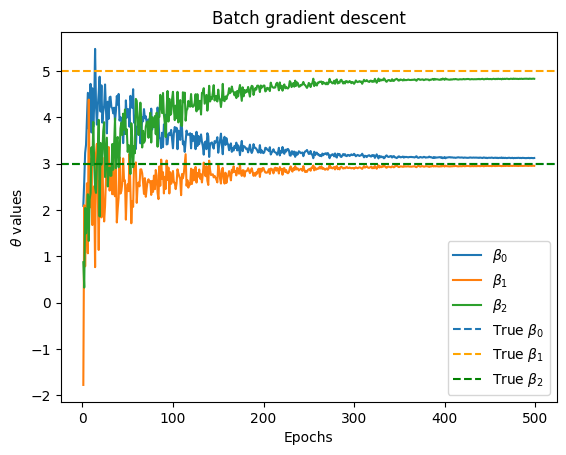

In [227]:
fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label = [r"$\beta_0$", r"$\beta_1$", r"$\beta_2$"])
ax.axhline(y = 3, linestyle="--", label = r"True $\beta_0$")
ax.axhline(y = 5, color = "orange", linestyle="--", label = r"True $\beta_1$")
ax.axhline(y = 3, color = "green", linestyle="--", label = r"True $\beta_2$")
ax.set(xlabel = "Epochs", ylabel = r"$\theta$ values", title ="Batch gradient descent")
ax.legend()